## Trabalho T3 - Aproximação de Funções: Interolação e ajuste por mínimos quadrados

### MTM 224 - Mét. Numéricos Computacionais

**Nome dos integrantes do grupo:** Augusto Kist Lunardi, Felipe da Cas Becker e Jonathan Weber Nogueira

### Questão 1
Considere os dados,
$$
\begin{array}{cccccc}
\hline
x    &1,6  &1,9  &2,5    &3,2   &3,9  &4,5 \\ \hline
f(x) &2,0  &8,0  &14,0   &15,5  &9,0  &2,1  \\
\hline
\end{array}
$$

(a) Calcule $f(2,9)$ usando polinômios interpoladores de Newton de segundo a quarto graus. Escolha a sequência de pontos que julgar mais adequada.
		 
(b) Utilize a expressão

$$ R_n \cong (x-x_0)(x-x_1)...(x-x_n)f[x_0, x_1,...,x_n, x]$$ 

para fazer uma estimativa do erro em cada uma das previsões.

		
(c) Para o polinômio que forneceu o melhor resultado, use a fórmula de Lagrange com os mesmos pontos e compare o resultado. Comente o que você observou.

Para o polinômio de grau 2, f(2.9) = 15.58242
Para o polinômio de grau 3, f(2.9) = 15.65507
Para o polinômio de grau 4, f(2.9) = 15.97683
Erro para grau 2: 0.72527
Erro para grau 3: 0.06617
Erro para grau 4: -0.32176
Para o polinômio de Lagrange, f(2.9) = 15.65507


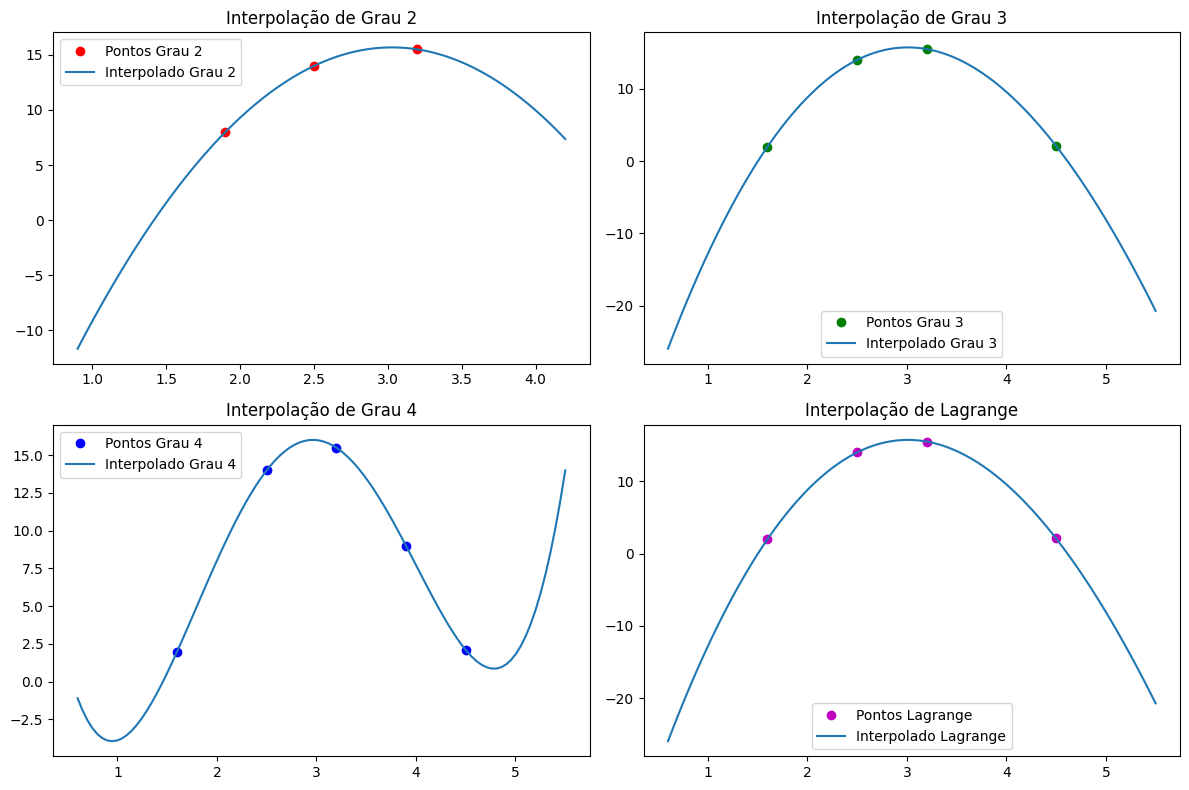

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_erro_interpolacao_newton(x, x_vals, dd):
    erro = 1
    for xi in x_vals:
        erro *= (x - xi)
    erro *= dd[-1][0]  # O último valor de dd é o coeficiente de maior grau
    return erro

# Função para calcular diferenças divididas
def calcular_diferencas_divididas(x, y):
    dd = [y]
    n = len(x)
    for o in range(1, n):
        dd.append([])
        for k in range(0, n - o):
            valor = (dd[o - 1][k + 1] - dd[o - 1][k]) / (x[k + o] - x[k])
            dd[o].append(valor)
    return dd

# Função para calcular o produtório
def produtorio(x, n, x_vals):
    prod = 1
    for i in range(n):
        prod = prod * (x - x_vals[i])
    return prod

# Função para calcular o polinômio interpolador
def calcular_polinomio(x, dd, x_vals):
    soma = dd[0][0]
    for i in range(1, len(x_vals)):
        soma = soma + produtorio(x, i, x_vals) * dd[i][0]
    return soma

def calcular_L(x, X, Y):
    n = len(X)
    valor = 0.0
    for k in range(n):
        lk = 1.0
        for i in range(n):
            if k!= i:
                lk = lk*(x-X[i])/(X[k]-X[i])
        valor = valor + Y[k]*lk
    return (valor)

# Dados para grau 2
grau2x = np.array([1.9, 2.5, 3.2])
grau2y = np.array([8.0, 14.0, 15.5])

# Dados para grau 3
grau3x = np.array([1.6, 2.5, 3.2, 4.5])
grau3y = np.array([2.0, 14.0, 15.5, 2.1])

# Dados para grau 4
grau4x = np.array([1.6, 2.5, 3.2, 3.9, 4.5])
grau4y = np.array([2.0, 14.0, 15.5, 9.0, 2.1])  

# Calcular diferenças divididas para cada conjunto de dados
dd_grau2 = calcular_diferencas_divididas(grau2x, grau2y)
dd_grau3 = calcular_diferencas_divididas(grau3x, grau3y)
dd_grau4 = calcular_diferencas_divididas(grau4x, grau4y)

# Gerar valores interpolados para cada conjunto de dados
Xp_grau2 = np.linspace(min(grau2x) - 1, max(grau2x) + 1, 100)
Yp_grau2 = [calcular_polinomio(x, dd_grau2, grau2x) for x in Xp_grau2]

Xp_grau3 = np.linspace(min(grau3x) - 1, max(grau3x) + 1, 100)
Yp_grau3 = [calcular_polinomio(x, dd_grau3, grau3x) for x in Xp_grau3]

Xp_grau4 = np.linspace(min(grau4x) - 1, max(grau4x) + 1, 100)
Yp_grau4 = [calcular_polinomio(x, dd_grau4, grau4x) for x in Xp_grau4]

Xp_lagrange = np.linspace(min(grau3x) - 1, max(grau3x) + 1, 100)
Yp_lagrange = [calcular_L(x, grau3x, grau3y) for x in Xp_lagrange]

# Grau 2
resultado_grau2 = calcular_polinomio(2.9, dd_grau2, grau2x)
print(f"Para o polinômio de grau 2, f(2.9) = {round(resultado_grau2,5)}")

# Grau 3
resultado_grau3 = calcular_polinomio(2.9, dd_grau3, grau3x)
print(f"Para o polinômio de grau 3, f(2.9) = {round(resultado_grau3,5)}")

# Grau 4
resultado_grau4 = calcular_polinomio(2.9, dd_grau4, grau4x)
print(f"Para o polinômio de grau 4, f(2.9) = {round(resultado_grau4,5)}")

erro_grau2 = calcular_erro_interpolacao_newton(2.9, grau2x, dd_grau2)
erro_grau3 = calcular_erro_interpolacao_newton(2.9, grau3x, dd_grau3)
erro_grau4 = calcular_erro_interpolacao_newton(2.9, grau4x, dd_grau4)

# Exibir os resultados
print(f"Erro para grau 2: {round(erro_grau2,5)}")
print(f"Erro para grau 3: {round(erro_grau3,5)}")
print(f"Erro para grau 4: {round(erro_grau4,5)}")

resultado_lagrange = calcular_L(2.9, grau3x, grau3y)
print(f"Para o polinômio de Lagrange, f(2.9) = {round(resultado_lagrange,5)}")


plt.figure(figsize=(12, 8))

# Plotar os resultados para grau 2
plt.subplot(2, 2, 1)
plt.plot(grau2x, grau2y, 'ro', label='Pontos Grau 2')
plt.plot(Xp_grau2, Yp_grau2, '-', label='Interpolado Grau 2')
plt.title('Interpolação de Grau 2')
plt.legend()

# Plotar os resultados para grau 3
plt.subplot(2, 2, 2)
plt.plot(grau3x, grau3y, 'go', label='Pontos Grau 3')
plt.plot(Xp_grau3, Yp_grau3, '-', label='Interpolado Grau 3')
plt.title('Interpolação de Grau 3')
plt.legend()

# Plotar os resultados para grau 4
plt.subplot(2, 2, 3)
plt.plot(grau4x, grau4y, 'bo', label='Pontos Grau 4')
plt.plot(Xp_grau4, Yp_grau4, '-', label='Interpolado Grau 4')
plt.title('Interpolação de Grau 4')
plt.legend()

# Plotar os resultados para Lagrange
plt.subplot(2, 2, 4)
plt.plot(grau3x, grau3y, 'mo', label='Pontos Lagrange')
plt.plot(Xp_lagrange, Yp_lagrange, '-', label='Interpolado Lagrange')
plt.title('Interpolação de Lagrange')
plt.legend()

plt.tight_layout()
plt.show()

**Comentários**

- A precisão dos resultados pode ser semelhante entre o polinômio de grau 3 de Newton e o polinômio de Lagrange. Ambos os métodos de interpolação são fundamentados em princípios diferentes, mas para um conjunto de pontos dados, a escolha entre eles pode depender da preferência ou de outros fatores.

- A fórmula de Lagrange é geralmente mais simples de expressar e entender do que a fórmula do polinômio interpolador de Newton, especialmente quando o número de pontos de interpolação aumenta.

- O polinômio de grau 3 de Newton foi escolhido com base no menor erro estimado. Isso pode ser observado na diferença nos valores absolutos dos erros 

- Polinômios de Newton podem ter um comportamento oscilatório, especialmente quando o número de pontos de interpolação é aumentado. Isso pode não ser tão evidente com um conjunto de dados pequeno, como neste caso.

### Questão 2
Os resultados da densidade da água $\rho$ para diferentes temperaturas são representados na tabela a seguir. 
$$
\begin{array}{cccccccc}
\hline
T(^\circ C)   &-10    &0      &10     &15     &20      &30      &60\\ \hline
\rho \, (g/cm^3)        &0,9981 &0,9998 &0,9997 &0,9991 &0,9982  &0,9957  &0,9832 \\
\hline
\end{array}
$$
Use interpolação para estimar $\rho(17,5)$  e para estimar a temperatura $T$ para que a densidade seja $0.9995$ g/cm $^3$. Justifique as escolhas do método e pontos utilizado. 



f(17.5) = 0.99868
Valor estimado de T para f(T) = 0.9995 (Valor que não está representado no gráfico): -2.97828


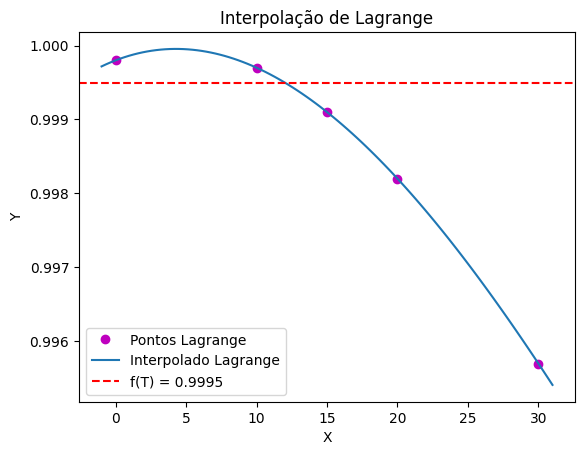

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def calcular_L(x):
    n = len(X)
    valor = 0.0
    for k in range(n):
        lk = 1.0
        for i in range(n):
            if k!= i:
                lk = lk*(x-X[i])/(X[k]-X[i])
        valor = valor + Y[k]*lk
    return (valor)

def equacao(x):
    return calcular_L(x) - 0.9995

X = np.array([0, 10, 15, 20, 30])
Y = np.array([0.9998, 0.9997, 0.9991, 0.9982, 0.9957]) 

resultado = calcular_L(17.5)
print(f"f(17.5) = {round(resultado,5)}")

x_estimado = fsolve(equacao, 0)[0]

print(f"Valor estimado de T para f(T) = 0.9995 (Valor que não está representado no gráfico): {round(x_estimado,5)}")

Xp_lagrange = np.linspace(min(X) - 1, max(X) + 1, 100)
Yp_lagrange = [calcular_L(x) for x in Xp_lagrange]

plt.plot(X, Y, 'mo', label='Pontos Lagrange')
plt.plot(Xp_lagrange, Yp_lagrange, '-', label='Interpolado Lagrange')
plt.axhline(y=0.9995, color='r', linestyle='--', label='f(T) = 0.9995')
plt.title('Interpolação de Lagrange')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

**Comentários**

- O método de Lagrange possui uma fórmula relativamente fácil de entender e implementar, o que é uma vantagem em termos de simplicidade conceitual.

- O polinômio interpolador de Lagrange é único para um conjunto de pontos dados. Isso significa que não há ambiguidade na escolha do polinômio interpolador, proporcionando consistência nos resultados.

- O conjunto de dados não é grande, o que implica que o número de termos no polinômio não crescerá descontroladamente. Isso é importante para evitar complexidade excessiva, especialmente quando lidamos com conjuntos de dados maiores.

- Não há adição ou remoção de pontos após o cálculo inicial, o que significa que não há necessidade de recalcular o polinômio completo. Isso pode economizar recursos computacionais, tornando o método eficiente.

- A exclusão dos pontos extremos foi realizada para obter resultados mais precisos, delimitando melhor o intervalo de interpolação. Isso pode ajudar a evitar problemas associados a oscilações indesejadas nos extremos do intervalo.

### QUESTÃO 3

Considere a função 
$$f(x)=\frac{3.17}{0.71 + 9.81x^2}$$

(a) Aproxime o valor de $f(1.78)$ usando um polinômio interpolador de grau 3 no intervalo [1, 2] e compare com o valor da função. Mostre o gráfico do polinômio e da função nesse intervalo. 

(b) Repita o item anterior, mas dessa vez utilize um polinômio de grau 10 no intervalo [-2,2] e comente o que você observou. 
	
(c)Pesquise e responda o que é "Fenômeno de Runge".

Valor aproximado de f(1.78): 0.09304
Valor real de f(1.78): 0.09971


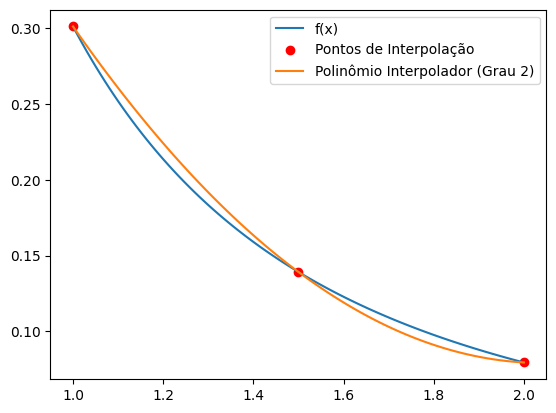

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 3.17 / (0.71 + 9.81 * x**2)

def lagrange_interpolation(x, xi, yi):
    n = len(xi)
    result = 0.0
    for j in range(n):
        term = yi[j]
        for i in range(n):
            if i != j:
                term *= (x - xi[i]) / (xi[j] - xi[i])
        result += term
    return result

# Dados para a função original
X_original = np.linspace(1, 2, 100)
Y_original = f(X_original)

# Pontos de interpolação
X_interp = np.array([1.0, 1.5, 2.0])
Y_interp = f(X_interp)

# Interpolação polinomial de Lagrange
X_interpolated = np.linspace(1, 2, 100)
Y_interpolated = [lagrange_interpolation(x, X_interp, Y_interp) for x in X_interpolated]

# Verificar o valor de f(1.78)
x_verificacao = 1.78
y_verificacao = lagrange_interpolation(x_verificacao, X_interp, Y_interp)
valor_real = f(x_verificacao)

print(f"Valor aproximado de f(1.78): {round(y_verificacao, 5)}")
print(f"Valor real de f(1.78): {round(valor_real, 5)}")

plt.plot(X_original, Y_original, label='f(x)')
plt.scatter(X_interp, Y_interp, color='red', label='Pontos de Interpolação')
plt.plot(X_interpolated, Y_interpolated, label='Polinômio Interpolador (Grau 2)')
plt.legend()
plt.show()


Valor aproximado de f(1.78): 10.91823
Valor real de f(1.78): 0.09971


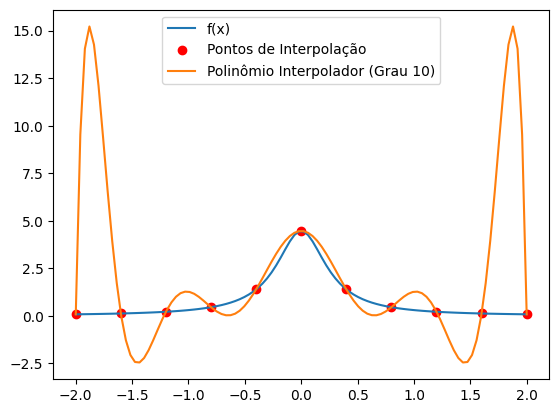

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 3.17 / (0.71 + 9.81 * x**2)

def lagrange_interpolation(x, xi, yi):
    n = len(xi)
    result = 0.0
    for j in range(n):
        term = yi[j]
        for i in range(n):
            if i != j:
                term *= (x - xi[i]) / (xi[j] - xi[i])
        result += term
    return result

# Dados para a função original
X_original = np.linspace(-2, 2, 100)
Y_original = f(X_original)

# Pontos de interpolação
X_interp = np.linspace(-2, 2, 11)
Y_interp = f(X_interp)

# Interpolação polinomial de Lagrange
X_interpolated = np.linspace(-2, 2, 100)
Y_interpolated = [lagrange_interpolation(x, X_interp, Y_interp) for x in X_interpolated]

# Verificar o valor de f(1.78)
x_verificacao = 1.78
y_verificacao = lagrange_interpolation(x_verificacao, X_interp, Y_interp)
valor_real = f(x_verificacao)

print(f"Valor aproximado de f(1.78): {round(y_verificacao, 5)}")
print(f"Valor real de f(1.78): {round(valor_real, 5)}")

plt.plot(X_original, Y_original, label='f(x)')
plt.scatter(X_interp, Y_interp, color='red', label='Pontos de Interpolação')
plt.plot(X_interpolated, Y_interpolated, label='Polinômio Interpolador (Grau 10)')
plt.legend()
plt.show()


**Comentários**

- No caso de um polinômio de grau 10, há um risco maior de ocorrer um sobreajuste. Isso significa que o polinômio pode se ajustar muito bem aos pontos de dados de treinamento, mas pode não ser uma representação precisa da função real em outras áreas. Portanto, o polinômio de grau 10 pode ser mais sensível aos ruídos nos dados.
- Com um polinômio de grau 10, o gráfico de g(x) poderá oscilar mais entre os pontos de dados devido à alta flexibilidade do polinômio. Isso pode levar a valores extremos em áreas específicas do gráfico.

O fenômeno de Runge explica as duas observações acima, ocorre quando você tenta ajustar uma função complexa ou irregular usando um polinômio de grau elevado para passar exatamente por um conjunto de pontos de dados. A ideia por trás da interpolação polinomial é criar um polinômio que passe por todos os pontos de dados, mas, surpreendentemente, usar um polinômio de grau muito alto para fazer isso pode resultar em oscilações indesejadas entre os pontos, levando a uma aproximação pobre da função real.

Essas oscilações excessivas ocorrem porque os polinômios de alta ordem têm muitos graus de liberdade, permitindo que se ajustem demais aos pontos de dados. À medida que o grau do polinômio aumenta, ele tenta ajustar-se a cada ponto de dados, mesmo aqueles que são ruído nos dados originais. Como resultado, a função interpoladora pode oscilar significativamente entre os pontos.

Uma solução para mitigar o fenômeno de Runge é usar métodos de interpolação mais estáveis, como Lagrange e Gregory-Newton, que podem fornecer aproximações mais suaves e estáveis da função entre os pontos de dados. Além disso, em muitos casos, não é necessário um grau de polinômio muito alto para obter uma boa aproximação da função, e polinômios de grau moderado podem ser mais adequados.

### QUESTÃO 4
Dados os seguintes pontos tabelados 
$$
\begin{array}{cccccccccc}
\hline
x_i    &0.01  &0.99  &2.02  &3.01  &3.97  &5.01  &5.93  &6.99  &8.08  \\
\hline
f(x_i) &0.000 &1.621  &1.782  &0.915 &-0.122 &-0.225 &1.099 &2.728 &3.534\\
\hline
\end{array}
$$

(a) Encontre o polinômio de grau 3 que melhor se ajusta aos pontos dados

(b) Encontre a função do tipo $g(x)=a_1x + a_2 sen(x)$ que melhor se ajusta 

(c) Decida qual das duas funções acima é a melhor escola para estimar $f(11.5)$. Jusfifique sua resposta.


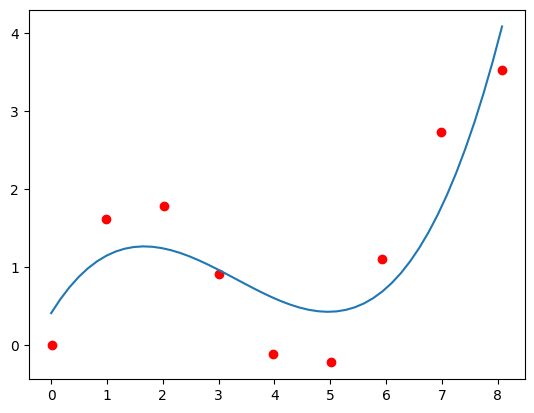

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

def g1(x):
    r = 0
    for i in range(n + 1):
        r += a[i] * x**i
    return r

n = 3
X = np.array([0.01,0.99,2.02,3.01,3.97,5.01,5.93,6.99,8.08])
Y = np.array([0.0,1.621,1.782,0.915,-0.122,-0.225,1.099,2.728,3.534])

A = np.zeros((n + 1, n + 1))
B = np.zeros(n + 1)

for i in range(n + 1):
    for j in range(n + 1):
        A[i, j] = np.sum(X**(i + j))

for i in range(n + 1):
    B[i] = np.sum(X**i * Y)

a = solve(A, B)

X2 = np.linspace(0, 8.08, 50)
Y2 = []

for x in X2:
    Y2.append(g1(x))

plt.plot(X, Y, "ro", X2, Y2)
plt.show()

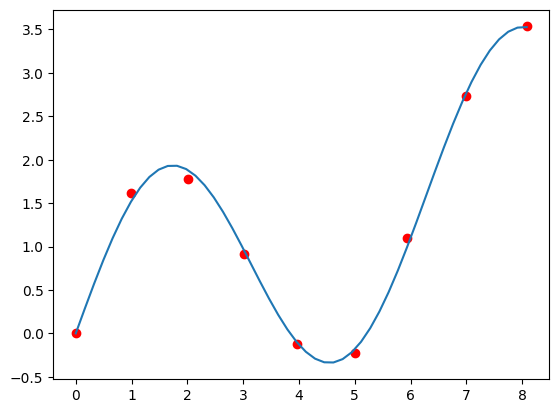

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

X = np.array([0.01,0.99,2.02,3.01,3.97,5.01,5.93,6.99,8.08])
Y = np.array([0.0,1.621,1.782,0.915,-0.122,-0.225,1.099,2.728,3.534])

A1 = np.sum(X**2)
A2 = np.sum(X*np.sin(X))
A3 = np.sum(np.sin(X)**2)

B1 = np.sum(X*Y)
B2 = np.sum(np.sin(X)*Y)

A = np.array([[A1,A2],[A2,A3]])
B = np.array([B1,B2])

a1,a2 = solve(A, B)

g2 = lambda x: a1*x+a2*np.sin(x)

X2 = np.linspace(0,8.08,50)
Y2,Y3 = [],[]
for x in X2:
    Y2.append(g2(x))

plt.plot(X, Y, "ro", X2, Y2)
plt.show()

In [37]:
print("Polinômio de grau 3:    ",round(g1(11.5),5))
print(f"G(x) = {round(a1,2)}x + {round(a2,2)}senx:",round(g2(11.5),5))

Polinômio de grau 3:     23.36891
G(x) = 0.25x + 1.51senx: 1.5946


**Comentários**

Observando os dois polinômios apresentados é notável que:
- A aproximação com a combinação de uma função linear com uma função seno possui, no intervalo de dados apresentado, erro muito menor que o polinômio de grau 3
- O resultado no ponto 11.5 é discrepante entre as duas aproximações, porém no segundo caso, o valor 1.5946 é muito mais próximo dos valores de F(x), que aparentemente está crescendo de forma oscilate

Portanto, a função combinada é melhor para estimar o valor dos dados fora do intervalo

### QUESTÃO 5
 Linearize o modelo matemático
$$ y = \alpha x e^{\beta x}$$ 
e encontre os parâmetros $\alpha$ e $\beta$ que fornecem o melhor ajute com base nos seguintes dados.  
$$
\begin{array}{cccccccccc}
\hline
x    &0,1 &0,2 &0,4 &0,6  &0,9 &1,1 &1,5 &1,7 &1,8\\
\hline
y    &0,75 &1,25 &1,45 &1,25 &0,85 &0,55 &0,35 &0,19 &0,18\\
\hline
\end{array}
$$

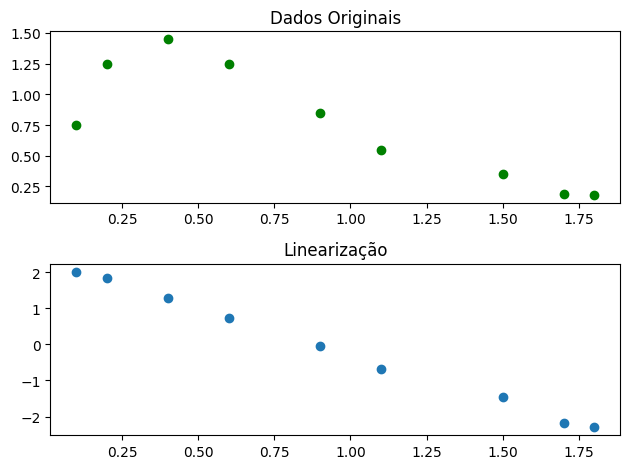

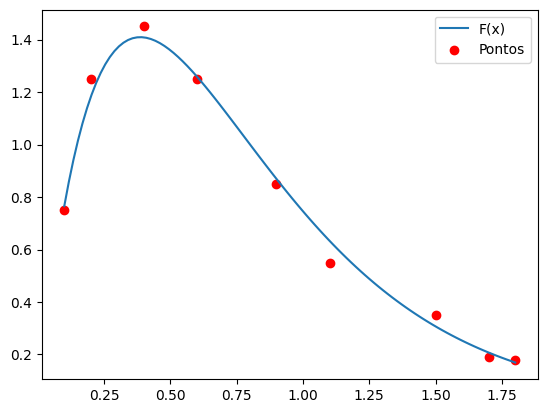

alfa =  9.91072
beta =  -2.58708


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.linalg import solve

def func(x,alfa,beta):
  return x*alfa*(math.e**(beta*x))

x = np.array([0.1, 0.2, 0.4, 0.6, 0.9, 1.1, 1.5, 1.7, 1.8])
y = np.array([0.75, 1.25, 1.45, 1.25, 0.85, 0.55, 0.35, 0.19, 0.18])

plt.subplot(2, 1, 1)
plt.plot(x, y, 'go')
plt.title('Dados Originais')

plt.subplot(2, 1, 2)
z = np.zeros(9)
for i in range(9):
    z[i] = math.log(y[i] / x[i])
plt.plot(x, z, 'o')
plt.title('Linearização')

plt.tight_layout()
plt.show()

somatX=0
somatX2=0
somatZ=0
somatXZ=0

for i in range(9):
  somatX+=x[i]
  somatX2+=x[i]**2
  somatZ+=z[i]
  somatXZ+=x[i]*z[i]

A=np.array([[somatX2,somatX],[somatX,9]])
B=np.array([somatXZ,somatZ])

B=solve(A,B)

alfa=math.e**B[1]
beta=B[0]

x_plot = np.linspace(0.1, 1.8, 100)
Y_plot = func(x_plot, alfa, beta)

plt.figure()
plt.plot(x_plot, Y_plot, label='F(x)')
plt.scatter(x, y, color='red', label='Pontos')
plt.legend()
plt.show()

print("alfa = " ,round(alfa,5))
print("beta = " ,round(beta,5))
